In [1]:
#importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# matplotlib defaults and configurations
plt.rc('figure', autolayout = True)
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize =10, titleweight = 'bold', titlepad = 10)
plt.rc('image', cmap = 'magma')

%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [3]:
# Read Image
image_path = '../input/computer-vision-resources/car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

In [4]:
# Define kernel
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
], dtype=tf.float32)

In [5]:
# Reformat for batch compatability
image = tf.image.convert_image_dtype(image,dtype=tf.float32)
image = tf.expand_dims(image,axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

In [6]:
# filter step
image_filter = tf.nn.conv2d(input = image,
                            filters = kernel,
                            strides=1,
                            padding = 'SAME')

In [7]:
# Detect step
image_detect = tf.nn.relu(image_filter)

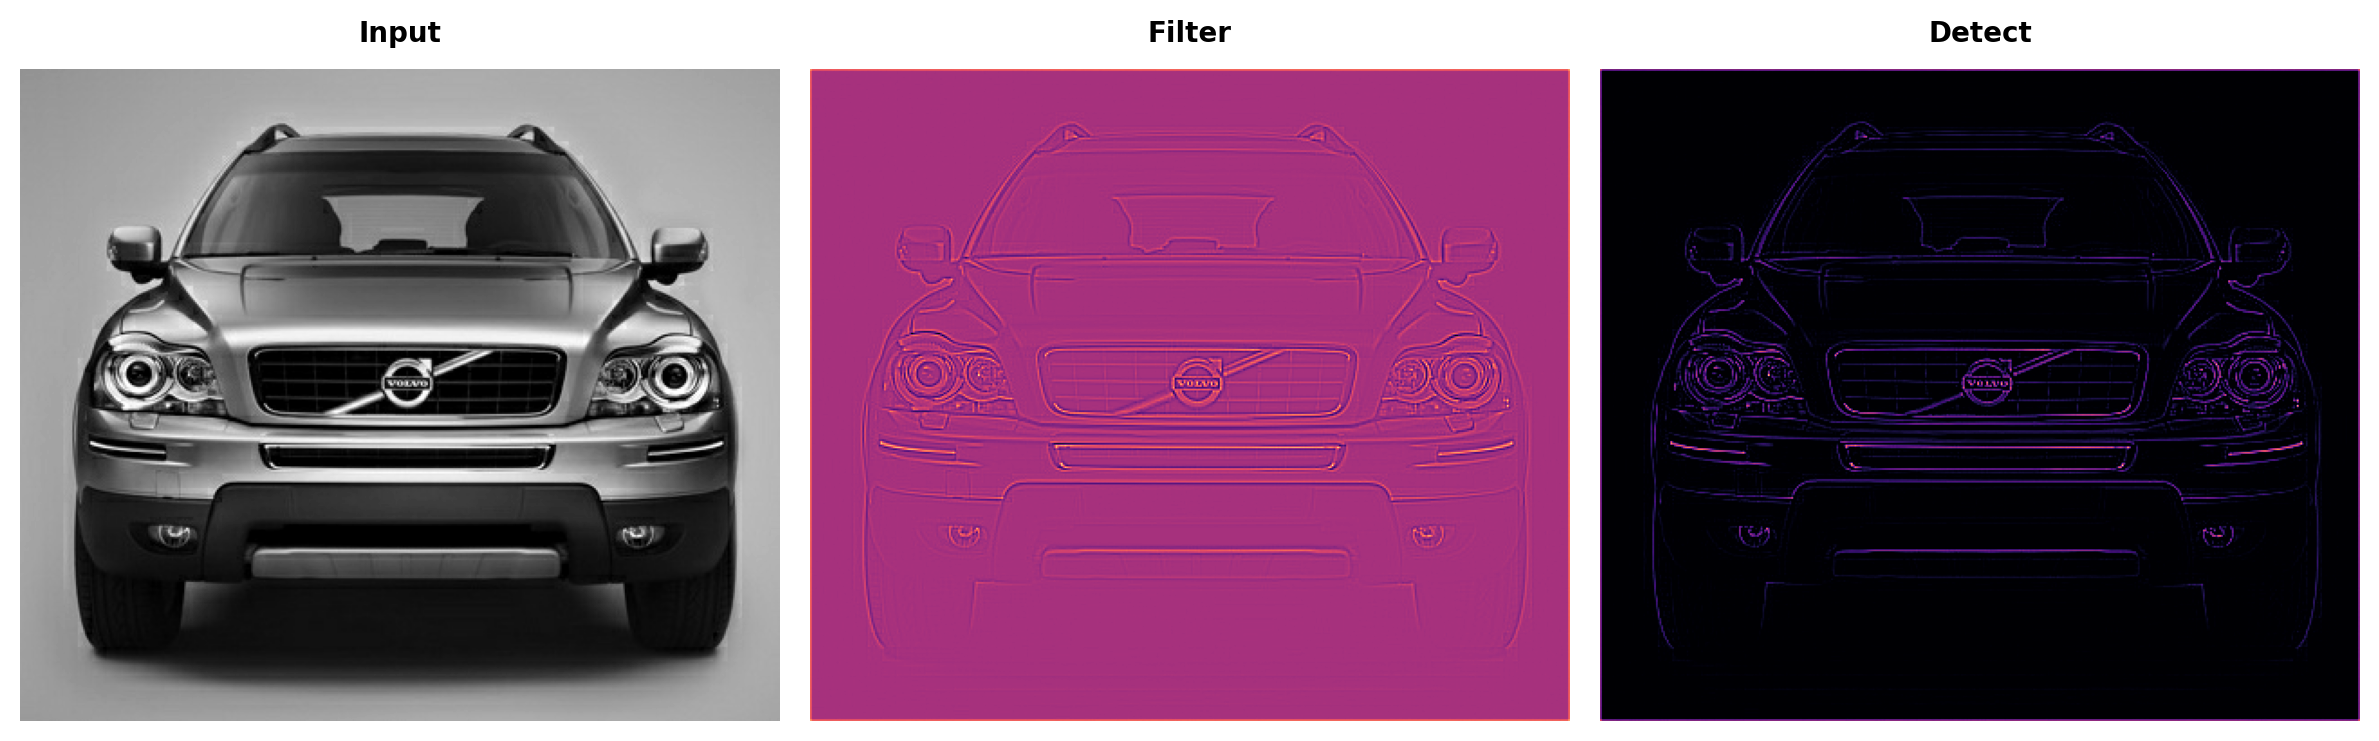

In [14]:
# show what we have so far
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')

plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')

plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Detect')
plt.show()

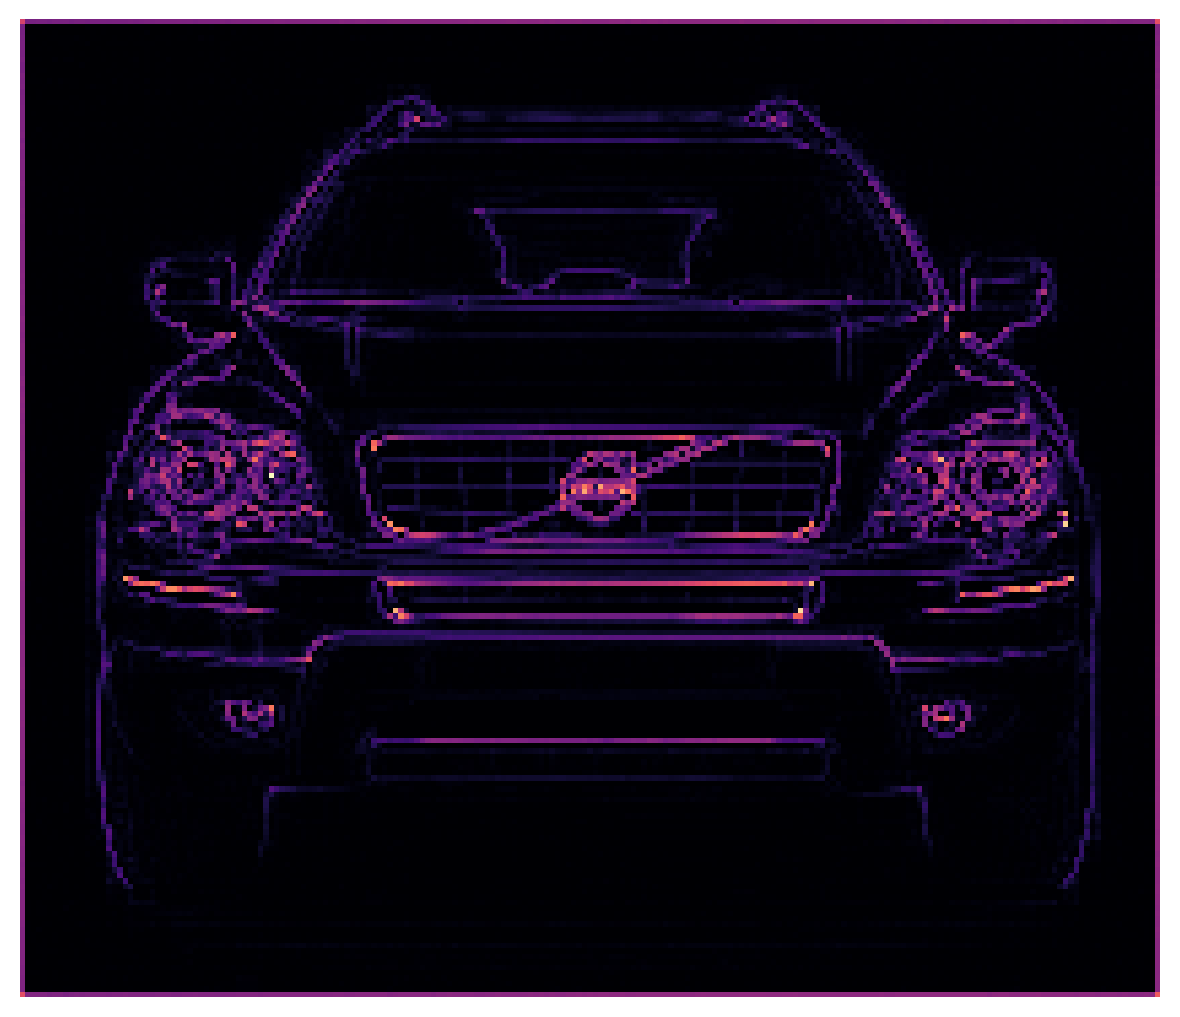

In [12]:
image_condense = tf.nn.pool(
                    input = image_detect,
                    window_shape=(2, 2),
                    pooling_type='MAX',
                    strides = (2,2),
                    padding = 'SAME')

plt.figure(figsize = (6,6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show()

In [ ]:
p